In [1]:
from utils import load_audio

In [2]:
waveform, sample_rate = load_audio('toefl_eg.mp3')

In [3]:
from diart_pipeline import OnlinePipeline, OnlinePipelineConfig
pipe_config = OnlinePipelineConfig()
pipe = OnlinePipeline(pipe_config)

/home/raid/miniconda3/envs/nemo/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
INFO:speechbrain.utils.quirks:Applied quirks (see `speechbrain.utils.quirks`): [disable_jit_profiling, allow_tf32]
INFO:speechbrain.utils.quirks:Excluded quirks specified by the `SB_DISABLE_QUIRKS` environment (comma-separated list): []
INFO:datasets:PyTorch version 2.6.0+cu126 available.
[NeMo W 2025-03-03 14:02:32 nemo_logging:361] /home/raid/miniconda3/envs/nemo/lib/python3.10/site-packages/diart/audio.py:8: UserWarning: torchaudio._backend.set_audio_backend has been deprecated. With dispatcher enabled, this function is no-op. You can remove the function call.
      torchaudio.set_audio_backend("soundfile")
    
[NeMo W 2025-03-03 14:02:35 modelPT:176] If you intend to do training or fine-tuning, please call the Mod

[NeMo I 2025-03-03 14:02:35 features:305] PADDING: 16
[NeMo I 2025-03-03 14:02:36 save_restore_connector:275] Model EncDecSpeakerLabelModel was successfully restored from /home/raid/.cache/huggingface/hub/models--nvidia--speakerverification_en_titanet_large/snapshots/0dc382f40121a5fbd34db10a2bb04d826c2be6a8/speakerverification_en_titanet_large.nemo.


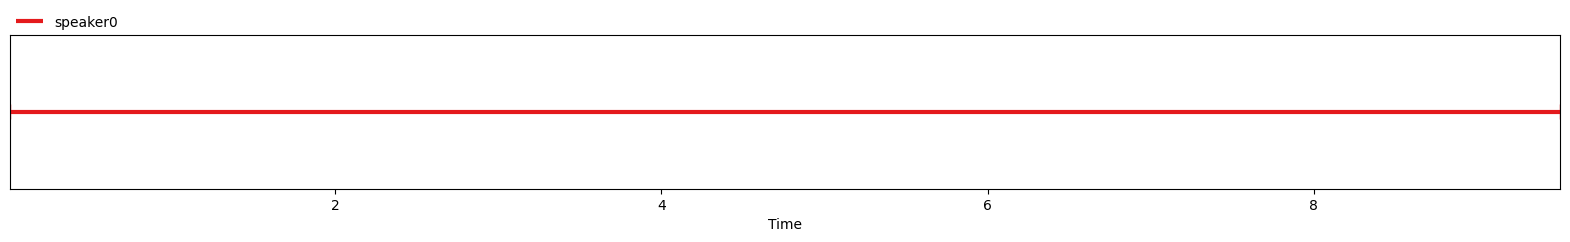

In [4]:
pipe(waveform.permute(1, 0).numpy()[:10*16000])

In [ ]:
pipe.transcribe()

INFO:faster_whisper:Processing audio with duration 00:09.500


In [ ]:
pipe._transcriptions

In [7]:
anno = pipe(waveform.permute(1, 0).numpy()[10*16000:20*16000])

In [10]:
anno = pipe(waveform.permute(1, 0).numpy()[20*16000:30*16000])

In [13]:
anno = pipe(waveform.permute(1, 0).numpy()[30*16000:40*16000])

In [14]:
anno = pipe(waveform.permute(1, 0).numpy()[40*16000:50*16000])

In [31]:
anno = pipe.get_annotation()

In [32]:
print(anno)

[ 00:00:00.008 -->  00:00:09.508] A speaker0


In [33]:

for segment, track, label in anno.itertracks(yield_label=True):
    print(segment, track, label)
    print(segment.end)
    # Check if this segment overlaps with our "new" section
    # segment_overlap = segment & new_segment
    # merged_annotation[segment_overlap, track] = label

[ 00:00:00.008 -->  00:00:09.508] A speaker0
9.508333333333333


In [35]:
anno.has_track(segment, track)

False

In [38]:
print(segment)

[ 00:00:00.008 -->  00:00:09.508]


In [39]:
print(anno)

[ 00:00:00.008 -->  00:00:17.508] A speaker0
[ 00:00:18.258 -->  00:00:19.508] B speaker0


In [25]:
anno.has_track(segment, 'C')

True

In [26]:
anno[segment, 'C']

'speaker0'

In [23]:
anno._tracks

SortedDict({<Segment(0.00853242, 17.5083)>: {'A': 'speaker0'}, <Segment(18.2583, 35.2917)>: {'B': 'speaker0'}, <Segment(35.925, 39.5083)>: {'C': 'speaker0'}})